In [54]:
from api_key import *
import numpy as np
import pandas as pd
import json
import os
import time
import networkx as nx
import scipy.stats as stats
import matplotlib.pyplot as plt #plotting
%matplotlib inline

In [10]:
from pyechonest import config
config.ECHO_NEST_API_KEY = api_key_1
#config.ECHO_NEST_API_KEY = api_key_2
#config.ECHO_NEST_API_KEY = api_key_3

In [3]:
from pyechonest import artist 

### Get the Top 1000 hottest singer

In [4]:
from pyechonest import artist 
hot1000_singer = artist.top_hottt(0, 1000)
singer_list = [i.name for i in hot1000_singer]

In [5]:
data = pd.DataFrame({'artist':singer_list})
data.to_csv('top1000.csv',encoding="utf-8",index=False)

In [6]:
singer_pd = pd.read_csv('top1000.csv', encoding="utf-8")

In [7]:
ln = len(singer_list)
singer_edge = pd.DataFrame(np.zeros(ln**2).reshape(ln,ln))

In [11]:
star = '*'*10
for i in range(ln):
    sim_list = [singer.name for singer in artist.Artist(singer_pd.iloc[i]['artist']).similar[:30]]
    for j in range(ln):
        if (i!=j)and(singer_pd.iloc[j]['artist'] in sim_list):
            singer_edge.iloc[i][j] = 1
    if ((i+1)%40==0):
        time.sleep(60)
    print('{0} {1}|{2} {3}'.encode("iso-8859-9").format(star, i+1, artist.Artist(singer_pd.iloc[i]['artist']), star))

********** 1|Adele **********
********** 2|Coldplay **********
********** 3|Justin Bieber **********
********** 4|Calvin Harris **********
********** 5|Taylor Swift **********
********** 6|Ellie Goulding **********
********** 7|One Direction **********
********** 8|The Weeknd **********
********** 9|Drake **********
********** 10|Ed Sheeran **********
********** 11|Avicii **********
********** 12|David Guetta **********
********** 13|Sam Smith **********
********** 14|Ariana Grande **********
********** 15|Kygo **********
********** 16|Sia **********
********** 17|Major Lazer **********
********** 18|Robin Schulz **********
********** 19|Selena Gomez **********
********** 20|Wiz Khalifa **********
********** 21|Lost Frequencies **********
********** 22|Rudimental **********
********** 23|Meghan Trainor **********
********** 24|Nicky Jam **********
********** 25|Shawn Mendes **********
********** 26|Maroon 5 **********
********** 27|Zara Larsson **********
********** 28|Jason Derülo ***

In [12]:
singer_edge.to_csv("total_artist_edge.csv",encoding="utf-8",index=True)

In [16]:
singer_edge = pd.read_csv("total_artist_edge.csv",encoding="utf-8",index_col='index')
singer_edge.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
singer_edge.index=list(singer_list)
singer_edge.columns=list(singer_list)
singer_edge.head()

,Adele,Coldplay,Justin Bieber,Calvin Harris,Taylor Swift,Ellie Goulding,One Direction,The Weeknd,Drake,Ed Sheeran,...,Jadakiss,Jencarlos Canela,Glass Animals,Larry Hernandez,JW,Joey Montana,White Noise,Billie Holiday,Stryper,TheFatRat
Adele,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Coldplay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Justin Bieber,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Calvin Harris,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Taylor Swift,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
singer_graph = nx.DiGraph()
singer_graph.add_nodes_from(singer_list)

In [20]:
for i in range(ln):
    for j in range(ln):
        if singer_edge.iloc[i][j]==1:
            singer_graph.add_edge(singer_list[i], singer_list[j])

### Visualize the network with artist names as nodes and sizes proportional to artists' hotness

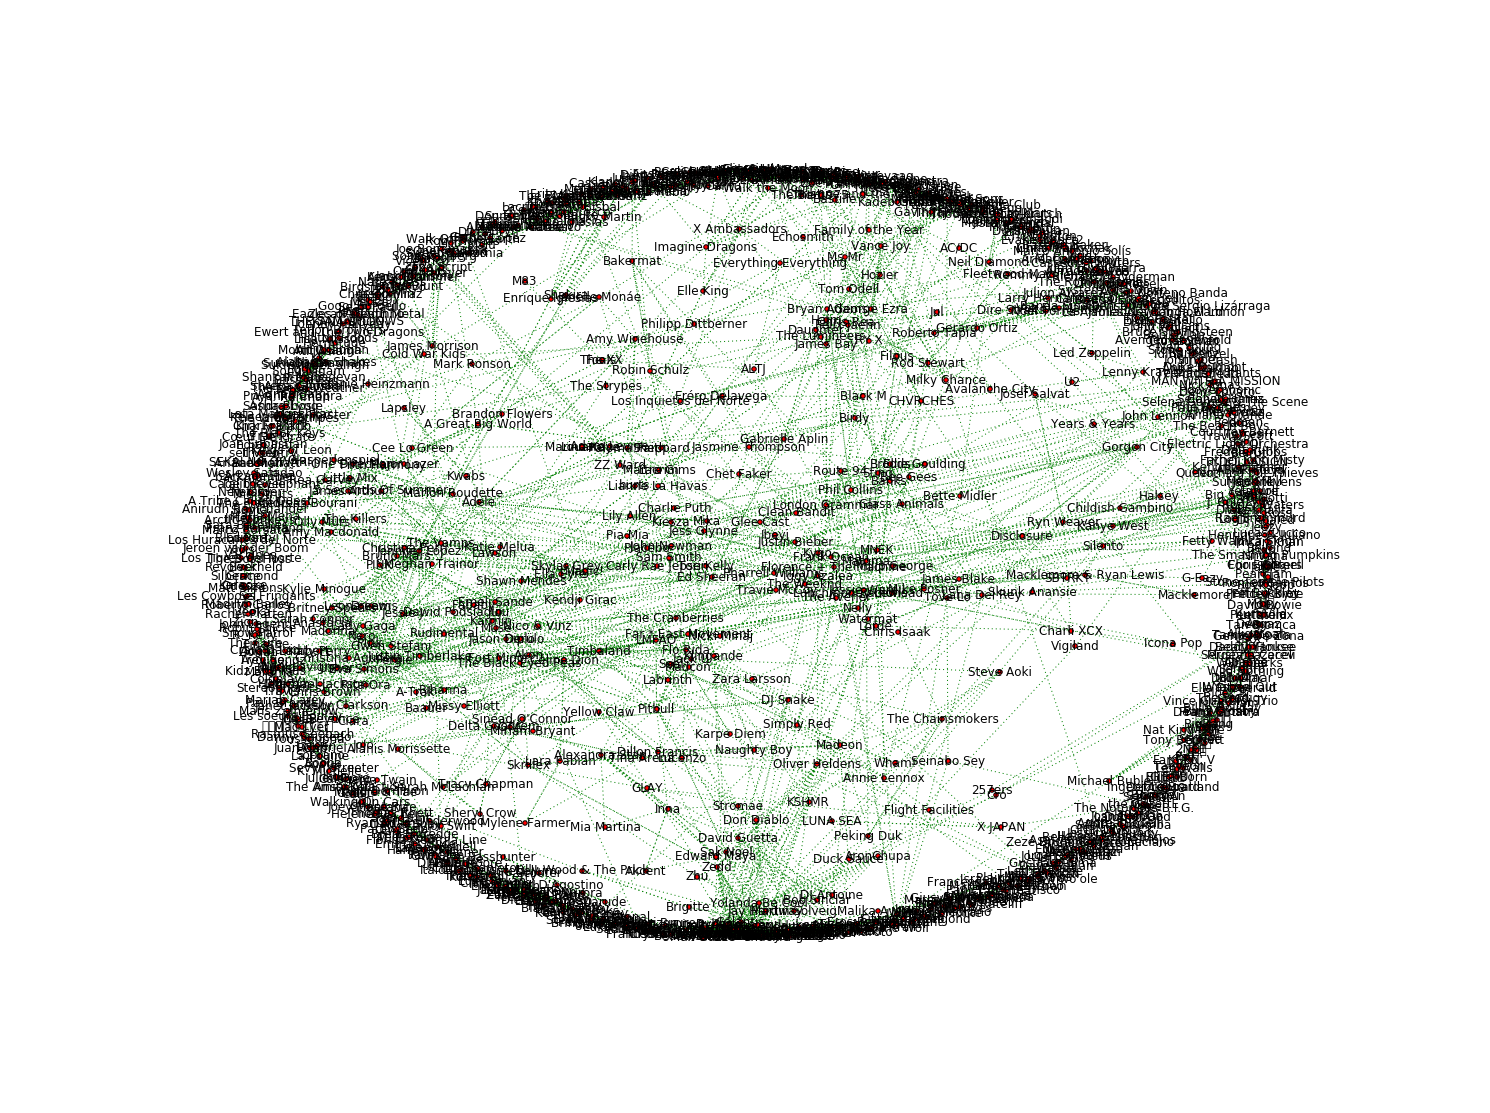

In [21]:
plt.figure(figsize = (20,15))
nx.draw(singer_graph,with_labels=True,arrows=False,node_size=20,style='dotted',edge_color='green')

In [22]:
singer_degree = nx.degree(singer_graph)

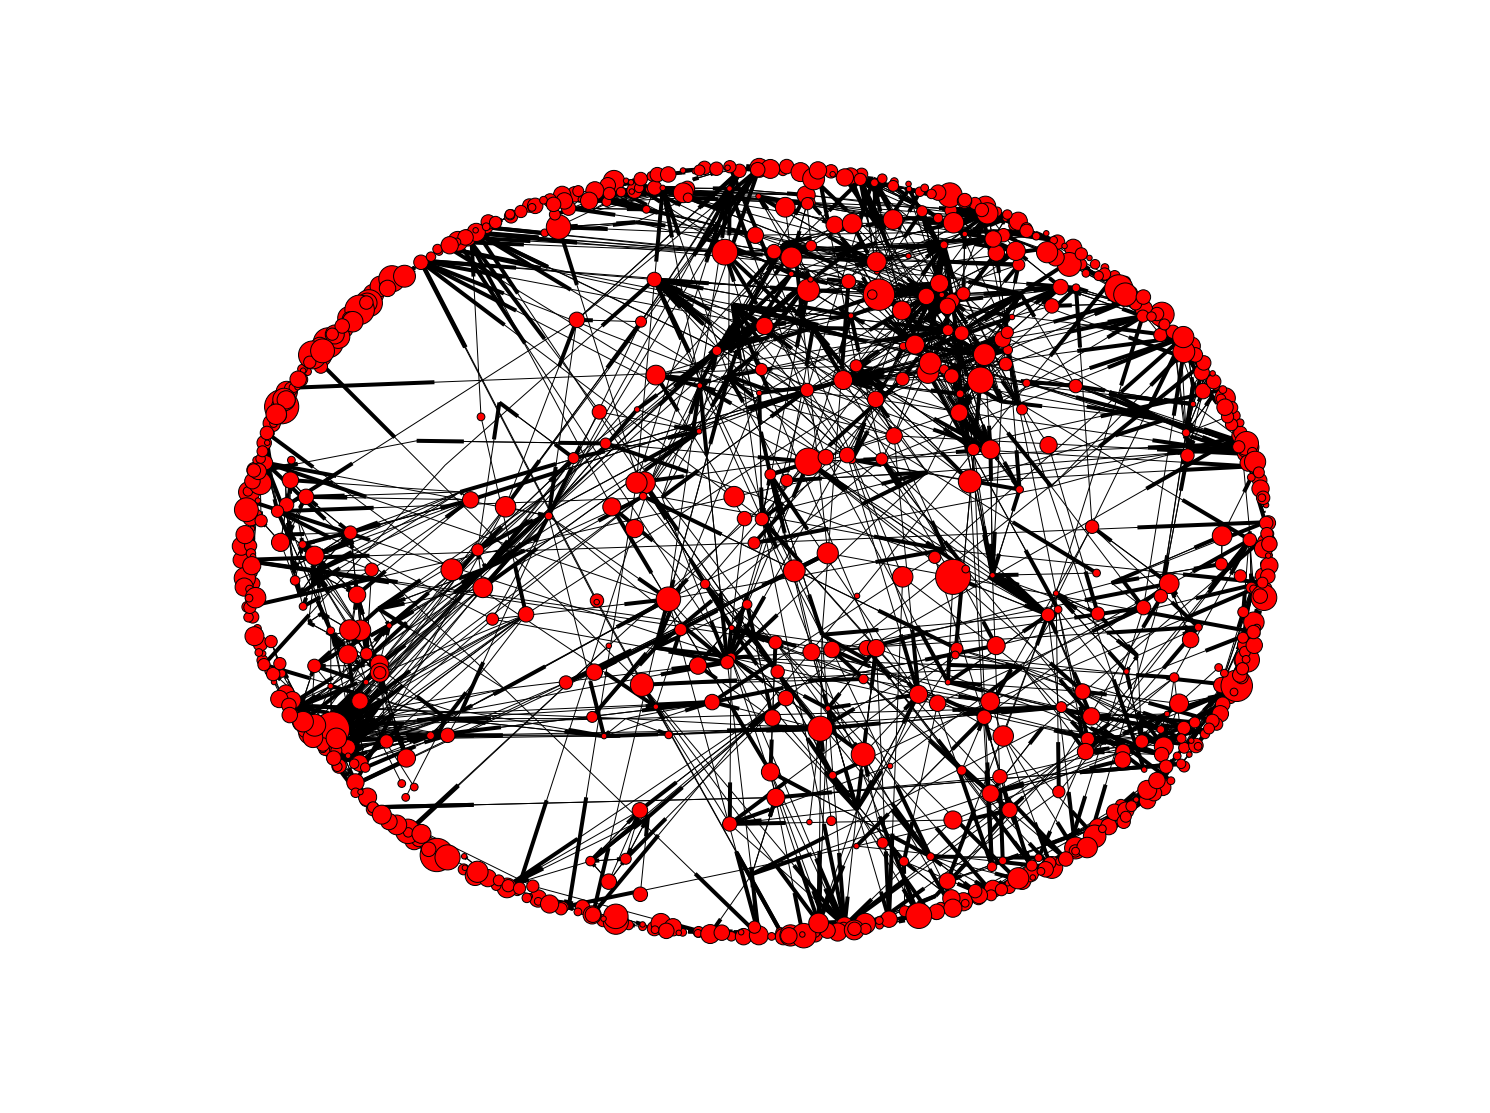

In [23]:
plt.figure(figsize = (20,15))
nx.draw(singer_graph,node_size=30*np.array(singer_degree.values()),with_labels=False,edge_color='black')

### Find artists which are network centers

In [30]:
# output top tn centrality scores, given the dictionary d
def topdict(d,tn):
    ind=sorted(d, key=d.get, reverse=True)  # sort dictionary based on degree values
    for i in range(0,tn):
        print('{0}|{1}:{2}'.decode("iso-8859-9").format(i+1,ind[i],d[ind[i]]))

In [31]:
topdict(singer_degree,10)

1|Swedish House Mafia:41
2|Avicii:40
3|Afrojack:39
4|Hardwell:37
5|Rihanna:33
6|Tiësto:33
7|Alesso:30
8|Kaskade:29
9|Gwen Stefani:27
10|Jennifer Lopez:26


In [32]:
# Eigenvector Centrality
c2= nx.eigenvector_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.389986251497
2|Avicii:0.378768807535
3|Sebastian Ingrosso:0.363326291606
4|Afrojack:0.354403262859
5|Kaskade:0.298645485528
6|Hardwell:0.292683243767
7|Tiësto:0.283062220298
8|Alesso:0.233475363102
9|Steve Angello:0.198482986219
10|Laidback Luke:0.181464026221


In [33]:
# Katz Centrality
c2= nx.katz_centrality_numpy(singer_graph)
topdict(c2,10)

1|Swedish House Mafia:0.281530194073
2|Avicii:0.272450208692
3|Afrojack:0.256599178896
4|Sebastian Ingrosso:0.243254864952
5|Hardwell:0.217761808812
6|Kaskade:0.212362429281
7|Tiësto:0.210105332621
8|Alesso:0.175156516948
9|Steve Angello:0.141862072833
10|Laidback Luke:0.125394638759


In [34]:
# Pagerank Centrality
a = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
for i in a:
    c5 = nx.pagerank(singer_graph,i)
    print ('a={0}'.format(i))
    topdict(c5,5)

a=0.95
1|Rick Ross:0.010998220039
2|Swedish House Mafia:0.0107358724006
3|Avicii:0.0102087156187
4|Tiësto:0.0093051508104
5|Afrojack:0.00919949598955
a=0.9
1|Swedish House Mafia:0.0089105486263
2|Avicii:0.0084496511099
3|Rick Ross:0.00834941630105
4|Tiësto:0.007903161846
5|Afrojack:0.00772213910276
a=0.85
1|Swedish House Mafia:0.00767197063998
2|Avicii:0.00726038746082
3|Tiësto:0.00692049955291
4|Rick Ross:0.00685092698401
5|Afrojack:0.00672968802577
a=0.8
1|Swedish House Mafia:0.00672499219311
2|Avicii:0.00635401453586
3|Tiësto:0.00614808593442
4|Afrojack:0.00597264559525
5|Rick Ross:0.00584025327032
a=0.7
1|Swedish House Mafia:0.00531233508027
2|Avicii:0.00500773253626
3|Tiësto:0.00496044411422
4|Rihanna:0.00490755046732
5|Afrojack:0.00483631324398
a=0.6
1|Swedish House Mafia:0.00427272090451
2|Rihanna:0.00412163831795
3|Tiësto:0.00405942919828
4|Avicii:0.00402255413749
5|Afrojack:0.00398331476045
a=0.5
1|Swedish House Mafia:0.00345499402534
2|Rihanna:0.00344455198282
3|Tiësto:0.0033

### Degree Distribution

In [35]:
#introduce auxiliary function visualizing the degree rank plots
def rankPlot(x,params=[]):
    #visualize the rankplot for the array x, fitting it with a power law, lognormal or normal distribution (according to fit) 
    #params - power-law fit cut-off
    xs=sorted(x,reverse=True) # sort the sequence in decreasing order
    plt.loglog(xs,'b-',marker='o') #create a log-log plot of the value vs its rank
    plt.title("Centrality rank plot") #plot title
    #axe labels  
    plt.ylabel("Centrality")
    plt.xlabel("rank")
    fp=[]                  
    #lognormal fit
    xl=np.log(x[x>0])
    sigma=np.std(xl)
    mu=np.mean(xl)  
    fp=sigma
    s=np.exp(mu)*stats.lognorm.ppf((np.array(range(0,len(xl)+1))+0.5)/(len(xl)+1),sigma)[::-1]
    plt.loglog(s,'r-',marker='.')  
    plt.show()
    return fp 

In [40]:
#introduce a function visualizing degree partial and cumulative distributions
def distribution(x,cdf,params=10):
    xh, xb=np.histogram(np.log(x),bins=params)
    xh=1.0*xh/len(x)
    xb=(xb[1:]+xb[0:-1])/2
    xb=xb[xh>0]
    xh=xh[xh>0]
    if cdf:
        xh=1-np.cumsum(xh[:-1])
        xb=xb[:-1]
        plt.ylabel("P(c>=x)")
    else:
        plt.ylabel("p(c=x)")
    plt.loglog(np.exp(xb),xh,'-b',marker='o')
    plt.xlabel("Centrality, x")

In [52]:
UG = singer_graph
for i in UG.nodes():
    if singer_degree[i]==0:
        UG.remove_node(i)

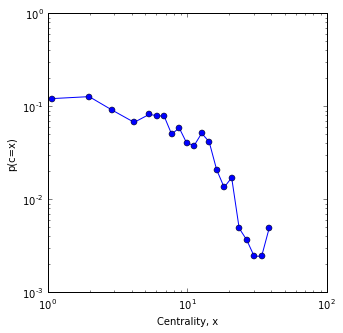

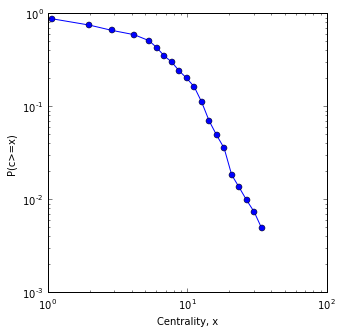

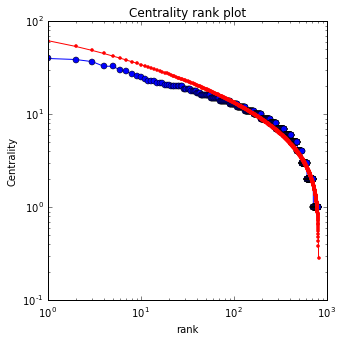

0.87724514095733652

In [55]:
#and visualize degree distributions for it
d=np.array(nx.degree(UG).values())
plt.figure(figsize = (5,5))
distribution(d,cdf=0,params=30)
plt.figure(figsize = (5,5))
distribution(d,cdf=1,params=30)
plt.figure(figsize = (5,5))
rankPlot(d,[1])

### Recommendation

* given a artist, find its most similar artists (only one edge away)

In [42]:
# take 'Maroon 5' as an example
selected_artist = ('Maroon 5').encode('utf-8') 
shortest_path = nx.single_source_shortest_path(singer_graph,selected_artist)

In [43]:
similar_artists_list = []
for key, value in shortest_path.iteritems():
    if len(value)==2:
        similar_artists_list.append(key)

In [44]:
print 'Similar artists to {0} are:'.format(selected_artist)
for i in range(0,len(similar_artists_list)):
    a = similar_artists_list[i].encode('utf-8')  # handle wrongly encoded charater
    print ('{0}|{1}').format(i+1,a)

Similar artists to Maroon 5 are:
1|Jason Mraz
2|James Blunt
3|OneRepublic
4|The Script
5|Train
6|Rob Thomas


* Given three random artists, find its most similar artists.

In [184]:
new_list = UG.nodes()
len(new_list)

815

In [57]:
import random

In [195]:
n = 5
rn = random.sample(range(len(new_list)), n)
rn_singer = [new_list[i].encode('utf-8')  for i in rn]
print(rn_singer)
shortest_dist= dict()
for i in new_list:
    shortest_dist[i]=0

['Nero', 'Miguel Bos\xc3\xa9', 'Jessie J', 'Luca Carboni', 'Lena']


In [194]:
for i in range(n):
    shortest_path = nx.single_source_shortest_path(UG,rn_singer[i])
    for j in shortest_path.iterkeys():
        ln = len(shortest_path[j])
        if ln>1:
            shortest_dist[j]+=ln

for i in new_list:
    if shortest_dist[i]==0:
        shortest_dist[i]=1000*n
import operator
sorted_shortest_dist = sorted(shortest_dist.items(), key=operator.itemgetter(1))
for i in sorted_shortest_dist[:10]:
    print(i[0].encode("utf-8"))

Ms Mr
Foo Fighters
Pearl Jam
The 1975
The Smashing Pumpkins
Robin Schulz
Stone Temple Pilots
Klangkarussell
Capital Cities
The Neighbourhood
